In [29]:
import numpy as np
from astropy.io import fits
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from astropy.io import fits
# from maxijdefs import *
import glob 

In [3]:
def write_to_fits(f_name, data):

    fits.PrimaryHDU(data).writeto(f_name, overwrite=True)

In [4]:
def get_filelist_nicer(pathnam, nicer_filt):
    # returns the list of NICER maxij1820 .lc files in the directory pathname
    # nicer_filt = phrase to filter among .lc files
    from os import listdir
    from os.path import isfile, join
    
    mypath=pathnam
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))] # this is a list of all files in the directory
    lc_files=list()
    nicer_files=list()
    for i in range(len(onlyfiles)):
        if ".lc" in onlyfiles[i]:
            lc_files.append(onlyfiles[i]) # this is a list of all .lc files
            
    for i in range(len(lc_files)):
        if nicer_filt in lc_files[i]:
            nicer_files.append(lc_files[i]) # this is a list of all selected .lc files
            
    return nicer_files

In [5]:
def logbin(f,p,df):
    #df = step size in log frequency
    fx=np.zeros(len(f))
    px=np.zeros(len(p))
    fx[:]=f[:]
    fx[0]=fx[1]
    p0=p[0]
    px[:]=p[:]
    px[0]=0.

    fl=np.log10(fx)
    nel=len(f)

    fmin=fl[1]
    fmax=np.max(fl)

    nf=np.round((fmax-fmin)/df).astype(int)
    f2=np.arange(nf)*df+fmin
    p2=np.zeros(nf)

    for i in range(nf):
        fa=10.**f2[i]
        fb=10.**(f2[i]+df)
        fm=(fa+fb)/2.0
        dff=fm-fa
        if len(f[np.abs(f-fm)<=dff])>0:
            p2[i]=np.mean(px[np.abs(f-fm)<=dff])

    return f2,p2

In [6]:
def rd_nicer_lc(pathnam, fnams):
    
    nfils=len(fnams)
    xlist=list()
    tlist=list()
    
    for i in range(nfils):
        fnam=pathnam+fnams[i]
    
        fID=open(fnam,'r')
    
    
        for j in range(16):
            line=fID.readline() # skip first 10 lines
        
        while True:
            line=fID.readline()
            if not line: break
            jnk=line.split()
        
            #print len(jnk)
            if len(jnk)==14:
                xlist.append(float(jnk[2]))
                tlist.append(float(jnk[1]))
            
        fID.close()
    
    return np.array(tlist).astype(float),np.array(xlist).astype(float)


In [7]:
def rd_nicer_lc34(pathnam, fnams):
    # bands 3 and 4
    
    nfils=len(fnams)
    xlist=list()
    tlist=list()
    
    for i in range(nfils):
        fnam=pathnam+fnams[i]
    
        fID=open(fnam,'r')
    
    
        for j in range(16):
            line=fID.readline() # skip first 10 lines
        
        while True:
            line=fID.readline()
            if not line: break
            jnk=line.split()
        
            #print len(jnk)
            if len(jnk)==14:
                xlist.append(float(jnk[6])+float(jnk[7]))
                tlist.append(float(jnk[1]))
            
        fID.close()
        
    return np.array(tlist).astype(float),np.array(xlist).astype(float)


In [8]:
def rd_nicer_lc0(pathnam, fnams):
    # band 0
    
    nfils=len(fnams)
    xlist=list()
    tlist=list()
    
    for i in range(nfils):
        fnam=pathnam+fnams[i]
    
        fID=open(fnam,'r')
    
    
        for j in range(16):
            line=fID.readline() # skip first 10 lines
        
        while True:
            line=fID.readline()
            if not line: break
            jnk=line.split()
        
            #print len(jnk)
            if len(jnk)==14:
                xlist.append(float(jnk[3]))
                tlist.append(float(jnk[1]))
            
        fID.close()
    return np.array(tlist).astype(float),np.array(xlist).astype(float)


In [9]:
def rd_nicer_lc1(pathnam, fnams):
    # band 1
    
    nfils=len(fnams)
    xlist=list()
    tlist=list()
    
    for i in range(nfils):
        fnam=pathnam+fnams[i]
    
        fID=open(fnam,'r')
    
    
        for j in range(16):
            line=fID.readline() # skip first 10 lines
        
        while True:
            line=fID.readline()
            if not line: break
            jnk=line.split()
        
            #print len(jnk)
            if len(jnk)==14:
                xlist.append(float(jnk[4]))
                tlist.append(float(jnk[1]))
            
        fID.close()

    return np.array(tlist).astype(float),np.array(xlist).astype(float)


In [10]:
def rd_nicer_lc2(pathnam, fnams):
    # band 2
    
    nfils=len(fnams)
    xlist=list()
    tlist=list()
    
    for i in range(nfils):
        fnam=pathnam+fnams[i]
    
        fID=open(fnam,'r')
    
    
        for j in range(16):
            line=fID.readline() # skip first 10 lines
        
        while True:
            line=fID.readline()
            if not line: break
            jnk=line.split()
        
            #print len(jnk)
            if len(jnk)==14:
                xlist.append(float(jnk[5]))
                tlist.append(float(jnk[1]))
            
        fID.close()
    
    return np.array(tlist).astype(float),np.array(xlist).astype(float)


In [11]:
def nicer_lc_2_1sts(t,cts):
    # makes 1s time series from NICER lightcurve
    
    t0=np.min(t)
    tf=np.max(t)
    t_span=np.round(tf-t0).astype(int)
    t2=t-t0
    
    yy=np.zeros(t_span)
    
    for i in range(t_span):
        if i%1000 == 0:
            print i, t_span
        j=[k for k in range(len(t)) if t2[k]>=i and t2[k]<i+1]
        if len(j)>0:
            yy[i]=yy[i]+np.sum(cts[j])
            
    return yy

In [13]:
def nicer_lc_2_ts(t,cts):
    # makes 1/8s time series from NICER lightcurve
    
    t0=np.min(t)
    tf=np.max(t)
    t_span=8*np.round(tf-t0).astype(int)
    t2=t-t0
    
    yy=np.zeros(t_span+20)
    
    tindex=(8*t2).astype(int)
    yy[tindex]=cts[:]
    
    return yy

In [26]:
pathnam='./delivery/'
ni_filt='ni1200120113_0mpu7_silver_GTI'
flist=get_filelist_nicer(pathnam, ni_filt)

In [27]:
print flist

['ni1200120113_0mpu7_silver_GTI7-v2-bands.lc', 'ni1200120113_0mpu7_silver_GTI20-v2-bands.lc.gz', 'ni1200120113_0mpu7_silver_GTI7-v2-bands.lc.gz', 'ni1200120113_0mpu7_silver_GTI24-v2-bands.lc', 'ni1200120113_0mpu7_silver_GTI11-v2-bands.lc.gz', 'ni1200120113_0mpu7_silver_GTI3-v2-bands.lc.gz', 'ni1200120113_0mpu7_silver_GTI2-v2-bands.lc.gz', 'ni1200120113_0mpu7_silver_GTI19-v2-bands.lc', 'ni1200120113_0mpu7_silver_GTI0-v2-bands.lc', 'ni1200120113_0mpu7_silver_GTI8-v2-bands.lc.gz', 'ni1200120113_0mpu7_silver_GTI24-v2-bands.lc.gz', 'ni1200120113_0mpu7_silver_GTI0-v2-bands.lc.gz', 'ni1200120113_0mpu7_silver_GTI3-v2-bands.lc', 'ni1200120113_0mpu7_silver_GTI11-v2-bands.lc', 'ni1200120113_0mpu7_silver_GTI2-v2-bands.lc', 'ni1200120113_0mpu7_silver_GTI19-v2-bands.lc.gz', 'ni1200120113_0mpu7_silver_GTI26-v2-bands.lc.gz', 'ni1200120113_0mpu7_silver_GTI27-v2-bands.lc.gz', 'ni1200120113_0mpu7_silver_GTI12-v2-bands.lc', 'ni1200120113_0mpu7_silver_GTI20-v2-bands.lc', 'ni1200120113_0mpu7_silver_GTI15-v2

In [36]:
flistD = glob.glob('delivery/ni1200120113_0mpu7_silver_GTI*.lc')

In [42]:
flist = [fnam.split('/')[1] for fnam in flistD]

In [43]:
print flist

['ni1200120113_0mpu7_silver_GTI7-v2-bands.lc', 'ni1200120113_0mpu7_silver_GTI24-v2-bands.lc', 'ni1200120113_0mpu7_silver_GTI19-v2-bands.lc', 'ni1200120113_0mpu7_silver_GTI0-v2-bands.lc', 'ni1200120113_0mpu7_silver_GTI3-v2-bands.lc', 'ni1200120113_0mpu7_silver_GTI11-v2-bands.lc', 'ni1200120113_0mpu7_silver_GTI2-v2-bands.lc', 'ni1200120113_0mpu7_silver_GTI12-v2-bands.lc', 'ni1200120113_0mpu7_silver_GTI20-v2-bands.lc', 'ni1200120113_0mpu7_silver_GTI15-v2-bands.lc', 'ni1200120113_0mpu7_silver_GTI27-v2-bands.lc', 'ni1200120113_0mpu7_silver_GTI26-v2-bands.lc', 'ni1200120113_0mpu7_silver_GTI8-v2-bands.lc']


In [44]:
t,cts=rd_nicer_lc(pathnam,flist)
t0,cts0=rd_nicer_lc0(pathnam,flist)
t1,cts1=rd_nicer_lc1(pathnam,flist)
t2,cts2=rd_nicer_lc2(pathnam,flist)
t34,cts34=rd_nicer_lc34(pathnam,flist)

In [45]:
fast_ts34=nicer_lc_2_ts(t34,cts34)
fast_ts0=nicer_lc_2_ts(t0,cts0)
fast_ts1=nicer_lc_2_ts(t1,cts1)
fast_ts2=nicer_lc_2_ts(t2,cts2)

fast_ts=nicer_lc_2_ts(t,cts)
#print len(fast_ts34),len(fast_ts2),len(fast_ts1),len(fast_ts0),len(fast_ts)

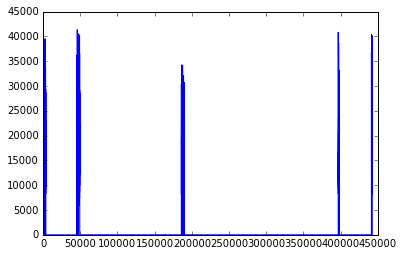

In [77]:
plt.plot(fast_ts)

In [47]:
def pds_chunk128(t,flx,t1,t2):
    # takes time series - not lightcurve - time and flx
    # extracts time from t1 to t2
    # calculates power spectrum in 128s segments and returns
    
    t_span=t2-t1
    n_chunk=np.round(t_span/128.0).astype(int)
    
    print t_span, n_chunk
    
    dt2=128.0/2.0 # half-width of chunk
    
    for i in range(n_chunk):
        ty=t-((i*dt2*2)+dt2+t1)
        y=flx[np.abs(ty)<=dt2]
        if i==0:
            flen=len(y)/2
            print i, flen
            p=np.zeros([n_chunk,flen])
            f=np.arange(flen)/(dt2*2)
        af=np.fft.fft(y)
        p[i,:]=np.abs(af[:flen])**2
        
    ptot=np.sum(p,axis=0)
    
    return f,p,ptot

In [48]:
def pds_chunk256(t,flx,t1,t2):
    # takes time series - not lightcurve - time and flx
    # extracts time from t1 to t2
    # calculates power spectrum in 256s segments and returns
    
    t_span=t2-t1
    n_chunk=np.round(t_span/256.0).astype(int)
    
    print t_span, n_chunk
    
    dt2=256.0/2.0 # half-width of chunk
    
    for i in range(n_chunk):
        ty=t-((i*dt2*2)+dt2+t1)
        y=flx[np.abs(ty)<=dt2]
        if i==0:
            flen=len(y)/2
            print i, flen
            p=np.zeros([n_chunk,flen])
            f=np.arange(flen)/(dt2*2)
        af=np.fft.fft(y)
        p[i,:]=np.abs(af[:flen])**2
        
    ptot=np.sum(p,axis=0)
    
    return f,p,ptot

In [49]:
def pds_chunk64(t,flx,t1,t2):
    # takes time series - not lightcurve - time and flx
    # extracts time from t1 to t2
    # calculates power spectrum in 64s segments and returns
    
    t_span=t2-t1
    n_chunk=np.round(t_span/64.0).astype(int)
    
    print t_span, n_chunk
    
    dt2=64.0/2.0 # half-width of chunk
    
    for i in range(n_chunk):
        ty=t-((i*dt2*2)+dt2+t1)
        y=flx[np.abs(ty)<=dt2]
        if i==0:
            flen=len(y)/2
            print i, flen
            p=np.zeros([n_chunk,flen])
            f=np.arange(flen)/(dt2*2)
        af=np.fft.fft(y)
        p[i,:]=np.abs(af[:flen])**2
        
    ptot=np.sum(p,axis=0)
    
    return f,p,ptot

In [50]:
def pds_chunk128_wgaps(t,flx,t1,t2):
    # takes time series - not lightcurve - time and flx
    # extracts time from t1 to t2
    # calculates power spectrum in 128s segments and returns
    # skips gaps
    
    t_span=t2-t1
    n_chunk=np.round(t_span/128.0).astype(int)
    
    print t_span, n_chunk
    
    dt2=128.0/2.0 # half-width of chunk
    
    for i in range(n_chunk):
        ty=t-((i*dt2*2)+dt2+t1)
        y=flx[np.abs(ty)<=dt2]
        if np.sum(y) > 3e5:
            af=np.fft.fft(y)
            if i==0:
                flen=len(y)/2
                print i, flen
                p=np.zeros([n_chunk,flen])
                f=np.arange(flen)/(dt2*2)
            p[i,:]=np.abs(af[:flen])**2
        
    ptot=np.sum(p,axis=0)
    
    return f,p,ptot

In [51]:
def p_2_logp_wgaps(f,p,df,n_avg):
    # takes output of pds_chunk128-style program
    # averages over n_avg pieces, and logbins the 2D array
    
    nt=p.shape[0] # number of power spectra
    
    for i in range(nt):
        i1=i-n_avg/2
        i2=i1+n_avg/2
        if i1<0:
            i1=0
        if i2>(nt-1):
            i2=nt-1
        if p[i,0]>1.0:
            pmean=np.mean(p[i1:i2+1,:],axis=0)/(np.mean(p[i1:i2+1,0])**0.5)
            dumf,dump=logbin(f,pmean,df)
            if i==0:
                nf=len(dump[dump>0])
                p2=np.zeros([nt,nf])
                f2=dumf[dump>0]
            p2[i,:]=dump[dump>0]
        
    return f2,p2

In [52]:
tf=np.arange(len(fast_ts34))/8.0

f,p0,ptot0=pds_chunk128_wgaps(tf,fast_ts0,0,np.max(tf))
f,p1,ptot1=pds_chunk128_wgaps(tf,fast_ts1,0,np.max(tf))
f,p2,ptot2=pds_chunk128_wgaps(tf,fast_ts2,0,np.max(tf))
f,p34,ptot34=pds_chunk128_wgaps(tf,fast_ts34,0,np.max(tf))
f,p,ptot=pds_chunk128_wgaps(tf,fast_ts,0,np.max(tf))


55307.375 432
0 512
55307.375 432
0 512
55307.375 432
0 512
55307.375 432
0 512
55307.375 432
0 512


In [78]:
print t[0]

133695597.98


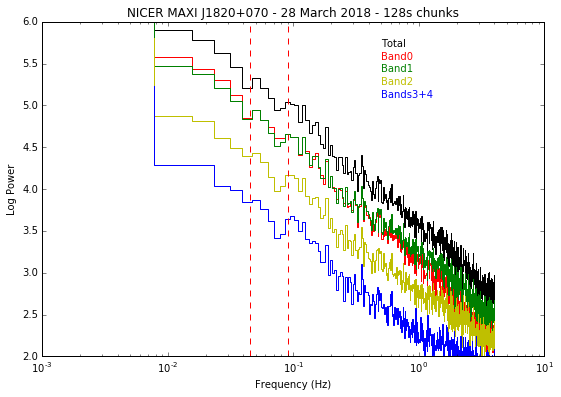

In [53]:
from matplotlib import ticker
fig,ax=plt.subplots(figsize=(9,6), facecolor='w')
ax.xaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_xscale('log')


ax.step((f[1:]),np.log10(ptot[1:]/(ptot[0]**0.5)),c='k')
ax.step((f[1:]),np.log10(ptot0[1:]/(ptot0[0]**0.5)),c='r')

ax.step((f[1:]),np.log10(ptot1[1:]/(ptot1[0]**0.5)),c='g')
ax.step((f[1:]),np.log10(ptot2[1:]/(ptot2[0]**0.5)),c='y')
ax.step((f[1:]),np.log10(ptot34[1:]/(ptot34[0]**0.5)),c='b')

#ax.set_xlim(-2.0,0.65)
ax.set_ylim(2.0,6)
ax.set_title('NICER MAXI J1820+070 - 28 March 2018 - 128s chunks')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Log Power')
ax.plot([0.09,0.09],[2,6],c='r',linestyle='--')
ax.plot([0.045,0.045],[2,6],c='r',linestyle='--')
ax.text(0.5,5.7,'Total',color='k')
ax.text(0.5,5.55,'Band0',color='r')
ax.text(0.5,5.4,'Band1',color='g')
ax.text(0.5,5.25,'Band2',color='y')
ax.text(0.5,5.1,'Bands3+4',color='b')

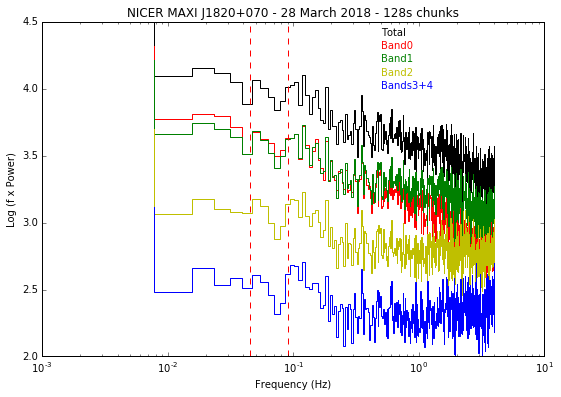

In [54]:
from matplotlib import ticker
fig,ax=plt.subplots(figsize=(9,6), facecolor='w')
ax.xaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_xscale('log')

ax.step((f[1:]),np.log10(f[1:]*ptot[1:]/(ptot[0]**0.5)),c='k')
ax.step((f[1:]),np.log10(f[1:]*ptot0[1:]/(ptot0[0]**0.5)),c='r')

ax.step((f[1:]),np.log10(f[1:]*ptot1[1:]/(ptot1[0]**0.5)),c='g')
ax.step((f[1:]),np.log10(f[1:]*ptot2[1:]/(ptot2[0]**0.5)),c='y')
ax.step((f[1:]),np.log10(f[1:]*ptot34[1:]/(ptot34[0]**0.5)),c='b')

#ax.set_xlim(-2.0,0.65)
ax.set_ylim(2.0,4.5)
ax.set_title('NICER MAXI J1820+070 - 28 March 2018 - 128s chunks')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Log (f x Power)')
ax.plot([0.09,0.09],[2,4.5],c='r',linestyle='--')
ax.plot([0.045,0.045],[2,4.5],c='r',linestyle='--')
ax.text(0.5,4.4,'Total',color='k')
ax.text(0.5,4.3,'Band0',color='r')
ax.text(0.5,4.2,'Band1',color='g')
ax.text(0.5,4.1,'Band2',color='y')
ax.text(0.5,4.0,'Bands3+4',color='b')

In [55]:
dumf,dump=logbin(f,ptot2/(ptot2[0]**0.5),0.05)
print dumf[dump>0]

[-2.10720997 -1.80720997 -1.65720997 -1.50720997 -1.45720997 -1.35720997
 -1.30720997 -1.20720997 -1.15720997 -1.10720997 -1.05720997 -1.00720997
 -0.95720997 -0.90720997 -0.85720997 -0.80720997 -0.75720997 -0.70720997
 -0.65720997 -0.60720997 -0.55720997 -0.50720997 -0.45720997 -0.40720997
 -0.35720997 -0.30720997 -0.25720997 -0.20720997 -0.15720997 -0.10720997
 -0.05720997 -0.00720997  0.04279003  0.09279003  0.14279003  0.19279003
  0.24279003  0.29279003  0.34279003  0.39279003  0.44279003  0.49279003
  0.54279003]


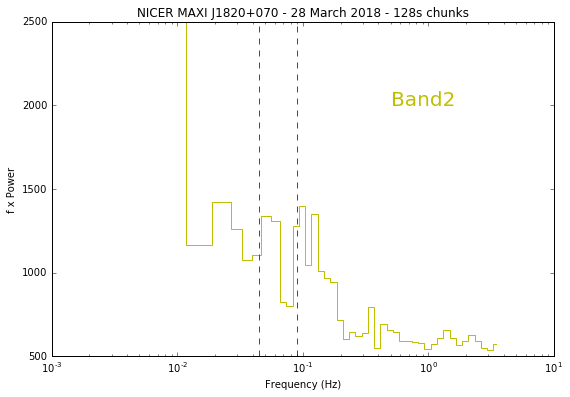

In [56]:
from matplotlib import ticker
fig,ax=plt.subplots(figsize=(9,6), facecolor='w')
ax.xaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_xscale('log')

#ax.step(10.**dumf[dump>0],(10.**dumf[dump>0.0])*dump[dump>0],c='y')
ax.plot(10.**dumf[dump>0],(10.**dumf[dump>0.0])*dump[dump>0],c='y',drawstyle='steps-mid')

#ax.set_xlim(-2.0,0.65)
ax.set_ylim(500.,2.5e3)
ax.set_title('NICER MAXI J1820+070 - 28 March 2018 - 128s chunks')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('f x Power')
ax.plot([0.045,0.045],[500,2500],c='r',linestyle='--')
ax.plot([0.09,0.09],[500,2500],c='r',linestyle='--')
ax.text(0.5,2000,'Band2',color='y',size=20)


In [57]:
dumf,dump=logbin(f,ptot34/(ptot34[0]**0.5),0.05)


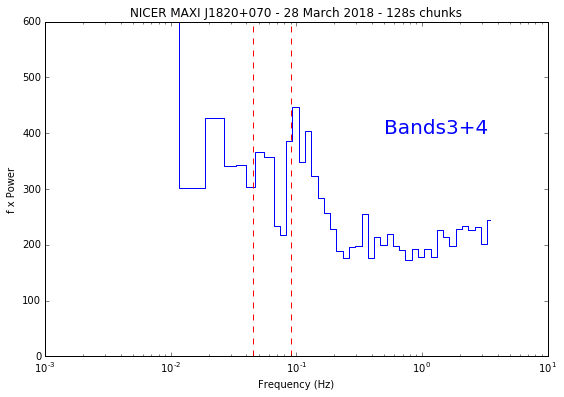

In [58]:
from matplotlib import ticker
fig,ax=plt.subplots(figsize=(9,6), facecolor='w')
ax.xaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_xscale('log')

ax.plot(10.**dumf[dump>0],(10.**dumf[dump>0.0])*dump[dump>0],c='b',drawstyle='steps-mid')

#ax.set_xlim(-2.0,0.65)
ax.set_ylim(0.,600)
ax.set_title('NICER MAXI J1820+070 - 28 March 2018 - 128s chunks')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('f x Power')
ax.plot([0.045,0.045],[0,600],c='r',linestyle='--')
ax.plot([0.09,0.09],[0,600],c='r',linestyle='--')
ax.text(0.5,400,'Bands3+4',color='b',size=20)

In [59]:
dumf,dump=logbin(f,ptot/(ptot[0]**0.5),0.05)


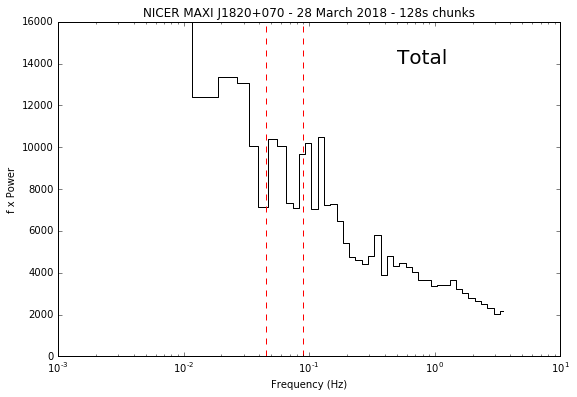

In [60]:
from matplotlib import ticker
fig,ax=plt.subplots(figsize=(9,6), facecolor='w')
ax.xaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_xscale('log')

ax.plot(10.**dumf[dump>0],(10.**dumf[dump>0.0])*dump[dump>0],c='k',drawstyle='steps-mid')

#ax.set_xlim(-2.0,0.65)
ax.set_ylim(0.,1.6e4)
ax.set_title('NICER MAXI J1820+070 - 28 March 2018 - 128s chunks')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('f x Power')
ax.plot([0.045,0.045],[0,16000],c='r',linestyle='--')
ax.plot([0.09,0.09],[0,16000],c='r',linestyle='--')
ax.text(0.5,14000,'Total',color='k',size=20)